<a href="https://colab.research.google.com/github/MRI-2021/Computer-science-fundamentals/blob/main/QA%20Academy%20project%3A%20from%20data%20preparation%20to%20deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning from data preparation to model deployment**
by Marco Riccardelli

### **In the first part of this notebook I will prepare the data and deploy the model using Python.**

### **In the last part of this notebook I will use the cleaned data to deploy the model using a pipeline in Azure ML Studio.**

# Part 1: Business and Data Understanding
### Q. Identify candidate questions for your machine learning project
**Stroke overview**: A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off.
Strokes are a medical emergency and urgent treatment is essential.
The sooner a person receives treatment for a stroke, the less damage is likely to happen.

**Causes of a stroke**: Like all organs, the brain needs the oxygen and nutrients provided by blood to function properly.
If the supply of blood is restricted or stopped, brain cells begin to die. This can lead to brain injury, disability and possibly death.

**Preventing a stroke**: You can significantly reduce your risk of having a stroke by:
*   eating a healthy diet
*   taking regular exercise
*   following the recommended guidelines on alcohol intake (not drinking more than 14 units a week)
*   not smoking

**Objective**: The goal of this analysis is to understand what causes strokes and how we can use Machine Learning (ML) and see if we can predict a stroke looking at some features like hypertension, heart disease, smoking status, BMI, etc
*   Input = gender, age, hypertension, heart disease, ever married, residence type, avg glucose level, BMI, smoking status.
*   Output = stroke.







### Q. Identify candidate questions for your machine learning project
1.   Does age has impact on strokes? and How is this parameter distributed?
2.   Does body mass index and glucose levels in a person, propel a heart stroke?
3.   Is it true that smoking can induce stroke?
4.   Is it true that people with a heart hisease are more at risk for a stroke?
5.   Is it true that high blood pressure could lead to stroke?
6.   Is it true that males are most susceptible to strokes?


### Q. Generate a descriptive statistics report for the columns in your dataset.

In [1]:
## Import the required libraries and dataset from GitHub.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/MRI-2021/Computer-science-fundamentals/main/stroke%20data.csv'
df = pd.read_csv (url)

In [2]:
print('\n=============INFO=============')
df.info()

print('\n=============COLUMN NUMBER DIFFERENT VALUES=============')
## Returns how many types of values you have e.g. column "ever_married" has 2 just possible values (Yes and No).
for col in df.columns:
  print(col + ' : ' + str(df[col].value_counts().count()))


=============INFO=============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

=============COLUMN NUMBER DIFFERENT VALUES=============
id : 5110
gender : 3
age : 104
hypertension : 2
heart_disease : 2
e

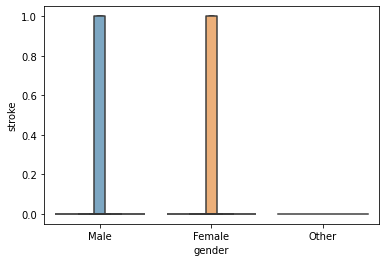

In [3]:
## Data visualisation: boxplot.
sns.boxenplot(x="gender", y="stroke", data=df)

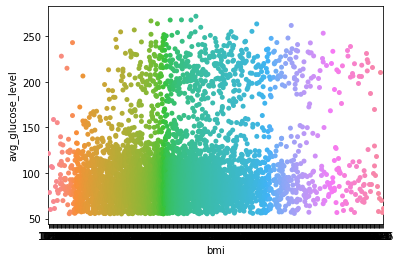

In [4]:
## Data visualisation: stripplot.
sns.stripplot(x="bmi", y="avg_glucose_level", data=df)

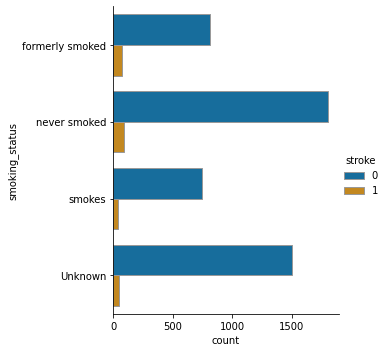

In [5]:
## Data visualisation: catplot.
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="colorblind", edgecolor=".6",
            data=df)

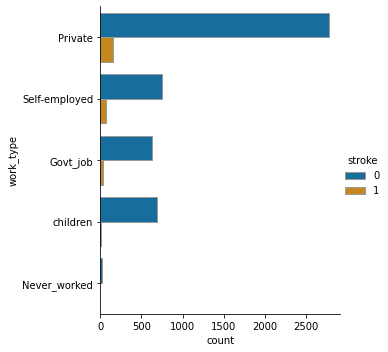

In [6]:
## Data visualisation: catplot.
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="colorblind", edgecolor=".6",
            data=df)

<Figure size 1224x504 with 0 Axes>

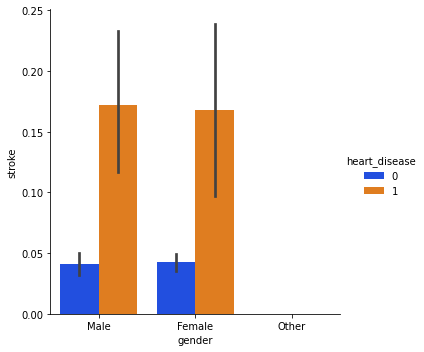

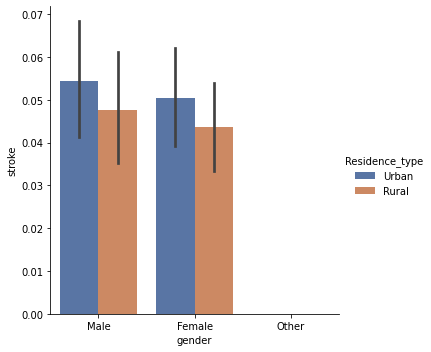

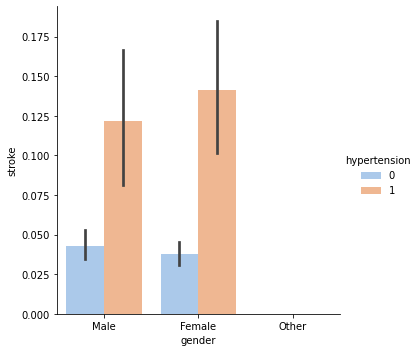

In [7]:
## Data visualisation: catplot.
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="bright", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="deep", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=df)
plt.show()

In [8]:
## Statistic report for dataset (transpose if you have a lot of columns).
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [9]:
## Correlation and visualisation to understand the data.
correlations = df.corr()
correlations

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


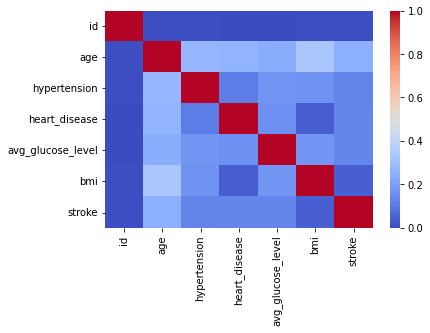

In [10]:
## Correlation heatmap.
import seaborn as sns
sns.heatmap(correlations, cmap='coolwarm')

**Cleaning data:**

Convert column "id" into index so it won't be considered in my model, because it is not required for my output in ML project.

Remove the 1 row with "other" in "gender", to make my dataset more consistent.

Encode categorical features into numerical values in "gender" (Female and Male), "ever_married" (No and Yes), "residence_type" (Rural and Urban). In this way I can use numerical values in ML project.

Replace with the mean of the same column the missing values on the BMI feauture, to avoid dropping 201 entries that are missing only the BMI values (I could also use the median).


In [11]:
## Convert column "id" into index so it won't be considered in my model, because it is not required for my output in ML project.
df = df.set_index('id')

In [12]:
## Remove the 1 row with "other" in "gender", to make my dataset more consistent.

## In this way I can find out that the row to remove is 56156.
df.sort_values(by='gender', ascending=False)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
24567,Male,51.0,0,0,Yes,Self-employed,Urban,69.18,35.7,smokes,0
67483,Male,31.0,1,0,Yes,Private,Urban,149.68,45.1,never smoked,0
59339,Male,5.0,0,0,No,children,Urban,82.41,18.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
64980,Female,42.0,0,0,Yes,Govt_job,Urban,65.66,33.7,never smoked,0
47521,Female,55.0,1,0,Yes,Govt_job,Urban,186.40,28.0,never smoked,0
41501,Female,47.0,0,0,Yes,Govt_job,Urban,122.32,23.9,Unknown,0


In [13]:
## Remove the 1 row with "other" in "gender", to make my dataset more consistent.
df = df.drop(index=56156) 

In [14]:
## Encode categorical features into numerical values in "gender" (Female and Male), "ever_married" (No and Yes), "residence_type" (Rural and Urban). 
## In this way I can use numerical values in ML project.
df.replace({'Female':0,'Male':1}, inplace=True)
df.replace({'No':0,'Yes':1}, inplace=True)
df.replace({'Rural':0,'Urban':1}, inplace=True)

In [15]:
## Replace with the mean of the "ibm" column the missing values on the BMI feauture, to avoid dropping 201 entries that are missing only the BMI values. 
## (I could also use the median).

## In this way I can find out the NaN values in "bmi".
df.sort_values(by='bmi', ascending=False, na_position='first')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
51676,0,61.00,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
27419,0,59.00,0,0,1,Private,0,76.15,NaN,Unknown,1
8213,1,78.00,0,1,1,Private,1,219.84,NaN,Unknown,1
25226,1,57.00,0,1,0,Govt_job,1,217.08,NaN,Unknown,1
61843,1,58.00,0,0,1,Private,0,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
45893,0,8.00,0,0,0,children,1,106.51,12.3,Unknown,0
20364,0,4.00,0,0,0,children,1,107.25,12.0,Unknown,0
59993,1,40.00,0,0,1,Private,0,60.96,11.5,never smoked,0


In [16]:
## Check the values for "bmi" mean and median.
df["bmi"].mean()
# df["bmi"].median()

28.894559902200502

In [17]:
## Replace with the mean of the "ibm" column the missing values.
df = df.fillna(df.bmi.mean())

# Part 2: Data Preparation
### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.


*   **Missing completely at random (MCAR)** = We can drop these MCAR rows for our analysis as they will not bias the models’ parameters.
*   **Missing at random (MAR)** = MAR data can be imputed using Multiple Imputation techniques or Maximum Likelihood estimations. If the dataset is large we can even chose to ignore the MAR rows.
*   **Missing Not at Random (MNAR)** = MNAR data is problematic as it biases the prediction. We can drop these MNAR rows from training subset.

In [18]:
## I need to drop columns that cannot be encoded and have categorical values (otherwise I will get NaN values during normalisation).
df = df.drop(['work_type'], axis=1)
df = df.drop(['smoking_status'], axis=1)

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
id,,,,,,,,,
9046,1,67.0,0,1,1,1,228.69,36.60000,1
51676,0,61.0,0,0,1,0,202.21,28.89456,1
31112,1,80.0,0,1,1,0,105.92,32.50000,1
60182,0,49.0,0,0,1,1,171.23,34.40000,1
1665,0,79.0,1,0,1,0,174.12,24.00000,1


In [20]:
## Clean dataset that can be use in Azure ML Studio.
df.to_csv('cleanstroke.csv')

In [21]:
## Model selection: Label (y) and Features (x).
y = df.loc[:,['stroke']]
x = df.iloc[:, 0:] # Input it is going to be all the columns in the dataset with categorical values.

#y.head()
x.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
id,,,,,,,,,
9046,1,67.0,0,1,1,1,228.69,36.60000,1
51676,0,61.0,0,0,1,0,202.21,28.89456,1
31112,1,80.0,0,1,1,0,105.92,32.50000,1
60182,0,49.0,0,0,1,1,171.23,34.40000,1
1665,0,79.0,1,0,1,0,174.12,24.00000,1


In [22]:
## Model selection: split dataset in Train and Test/Production datasets (Train should be bigger than Test).
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42) # random_state is the seed to start the random sequence.

#xtrain.head()
#test.head()
#ytrain.head()
ytest.head()

,stroke
id,
40041,0
55244,0
69824,0
38207,0
8541,0


In [23]:
## Normalisation: calculate Z-score (standard deviations from the mean) 
## Assumptions for Z test is: samples from population are independent of each other, population is normally distributed.

## assumptions from Training data are applied to Testing data
stats = xtrain.describe().T

# Z-score
xmean = stats['mean']
xstd = stats['std']

# Z-score = (data - mean) / standard deviation
xtrain_z_norm = (xtrain-xmean)/xstd
xtest_z_norm = (xtest-xmean)/xstd

# Z-score normalise
xtrain_z_norm.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
id,,,,,,,,,
4970,1.195011,1.588400,-0.320131,-0.230361,0.728804,-1.017899,0.142686,-0.052799,-0.218945
56137,-0.836607,0.836778,-0.320131,-0.230361,0.728804,0.982175,-0.392671,0.953410,-0.218945
54590,-0.836607,-0.975956,-0.320131,-0.230361,-1.371775,-1.017899,-1.026646,0.618007,-0.218945
36548,1.195011,-0.533825,-0.320131,-0.230361,0.728804,0.982175,-0.890605,0.192304,-0.218945
61171,-0.836607,-0.533825,-0.320131,-0.230361,-1.371775,-1.017899,-1.024224,-1.162208,-0.218945


In [24]:
## Min-max normalization (the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1)

## assumptions from Training data are applied to Testing data
stats = xtrain.describe().T

# Min-max
xmax = stats['max']
xmin = stats['min']

# Min-max = (data - min) / (max - min)
xtrain_mm_norm = (xtrain-xmin)/(xmax-xmin)
xtest_mm_norm = (xtest-xmin)/(xmax-xmin)

# values scaled from 0 to 1 
xtrain_mm_norm.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
id,,,,,,,,,
4970,1.0,0.963379,0.0,0.0,1.0,0.0,0.265534,0.208477,0.0
56137,0.0,0.755859,0.0,0.0,1.0,1.0,0.153264,0.297824,0.0
54590,0.0,0.255371,0.0,0.0,0.0,0.0,0.020312,0.268041,0.0
36548,1.0,0.377441,0.0,0.0,1.0,1.0,0.048841,0.230241,0.0
61171,0.0,0.377441,0.0,0.0,0.0,0.0,0.020820,0.109966,0.0


In [25]:
# Normalising data: Machine Learning only happens with numbers, so I have to convert categorical into numerical values in input "stroke".
# In this case "stroke" is already encoded.
ytrain_encoded = ytrain['stroke']
ytest_encoded = ytest['stroke']

ytrain_encoded.head()
#ytest_encoded.head()

id
4970     0
56137    0
54590    0
36548    0
61171    0
Name: stroke, dtype: int64

# Part 3: Model Selection
### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

In [26]:
# Import Models:
xtrain_norm = xtrain_z_norm # If we decide to use Z score.

from sklearn.ensemble import RandomForestClassifier # If we decide to use RandomForestClassifier.
model = RandomForestClassifier()
model.fit(xtrain_norm, ytrain_encoded)

RandomForestClassifier()

In [27]:
# Import Models:
xtest_norm = xtest_z_norm # If we decide to use Z score.

ypred = model.predict(xtest_norm) # Prediction generated by the Model.
#ypred ## To visualise the whole array.
ypred[:10] # If the array is to big to be visualised.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
# Compare prediction with Test dataset
print(ytest_encoded)
print('\n')
print(ypred)

id
40041    0
55244    0
69824    0
38207    0
8541     0
        ..
49553    0
13171    0
41600    0
39236    0
60276    0
Name: stroke, Length: 1022, dtype: int64


[0 0 0 ... 0 0 0]


In [29]:
# ## This is an example of another Model that can be imported: KNeighborsClassifier.

# xtrain_norm = xtrain_z_norm
# xtest_norm = xtest_z_norm

# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier()
# model.fit(xtrain_norm,ytrain_encoded)

# predictions = model.predict(xtest_norm)
# predictions

# Part 4: Model Evaluation
### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.
Classification Metrics:

In [30]:
# Model Evaluation - Accuracy
from sklearn.metrics import accuracy_score
accuracy_m1 = accuracy_score(ypred,ytest_encoded) # m1 = because this is the first model I used to predict.
accuracy_m1

1.0

In [31]:
# Model Evaluation - Cross validation score
from sklearn.model_selection import cross_val_score
csv_m1 = cross_val_score(model, xtrain_norm, ytrain_encoded, cv=5)
csv_m1

array([1., 1., 1., 1., 1.])

# Part 5: Stretch - Model Deployment
### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

In [38]:
# Model Deployment - Export model
import pickle
pickle.dump(model, open('MRIfinalmodel1.plk', 'wb'))

In [33]:
# Model Deployment - Consume code
import sklearn
print(sklearn.__version__)

1.0.2


### Model Deployment: Type: Azure Container Instance

In [ ]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
}

body = str.encode(json.dumps(data))

url = 'http://b5c8e7d6-96bf-4726-8b4a-4f565d713e25.uksouth.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

# Aure ML Studio (using cleaned data for the pipeline)

In [34]:
!pip install azureml-core
!pip install azureml-dataset-runtime

In [35]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'ea185ecb-1dc7-45b7-bdcf-f5b89e844e33'
resource_group = 'Fruit'
workspace_name = 'LameLemon'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='stroke')
dataset.to_pandas_dataframe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,1,228.69,36.60000,1
1,0,61.0,0,0,1,0,202.21,28.89456,1
2,1,80.0,0,1,1,0,105.92,32.50000,1
3,0,49.0,0,0,1,1,171.23,34.40000,1
4,0,79.0,1,0,1,0,174.12,24.00000,1
...,...,...,...,...,...,...,...,...,...
5104,0,80.0,1,0,1,1,83.75,28.89456,0
5105,0,81.0,0,0,1,1,125.20,40.00000,0
5106,0,35.0,0,0,1,0,82.99,30.60000,0
5107,1,51.0,0,0,1,0,166.29,25.60000,0


In [36]:
data = dataset.to_pandas_dataframe()
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,1,228.69,36.60000,1
1,0,61.0,0,0,1,0,202.21,28.89456,1
2,1,80.0,0,1,1,0,105.92,32.50000,1
3,0,49.0,0,0,1,1,171.23,34.40000,1
4,0,79.0,1,0,1,0,174.12,24.00000,1


### Classification Model: Multiclass Decision Forest

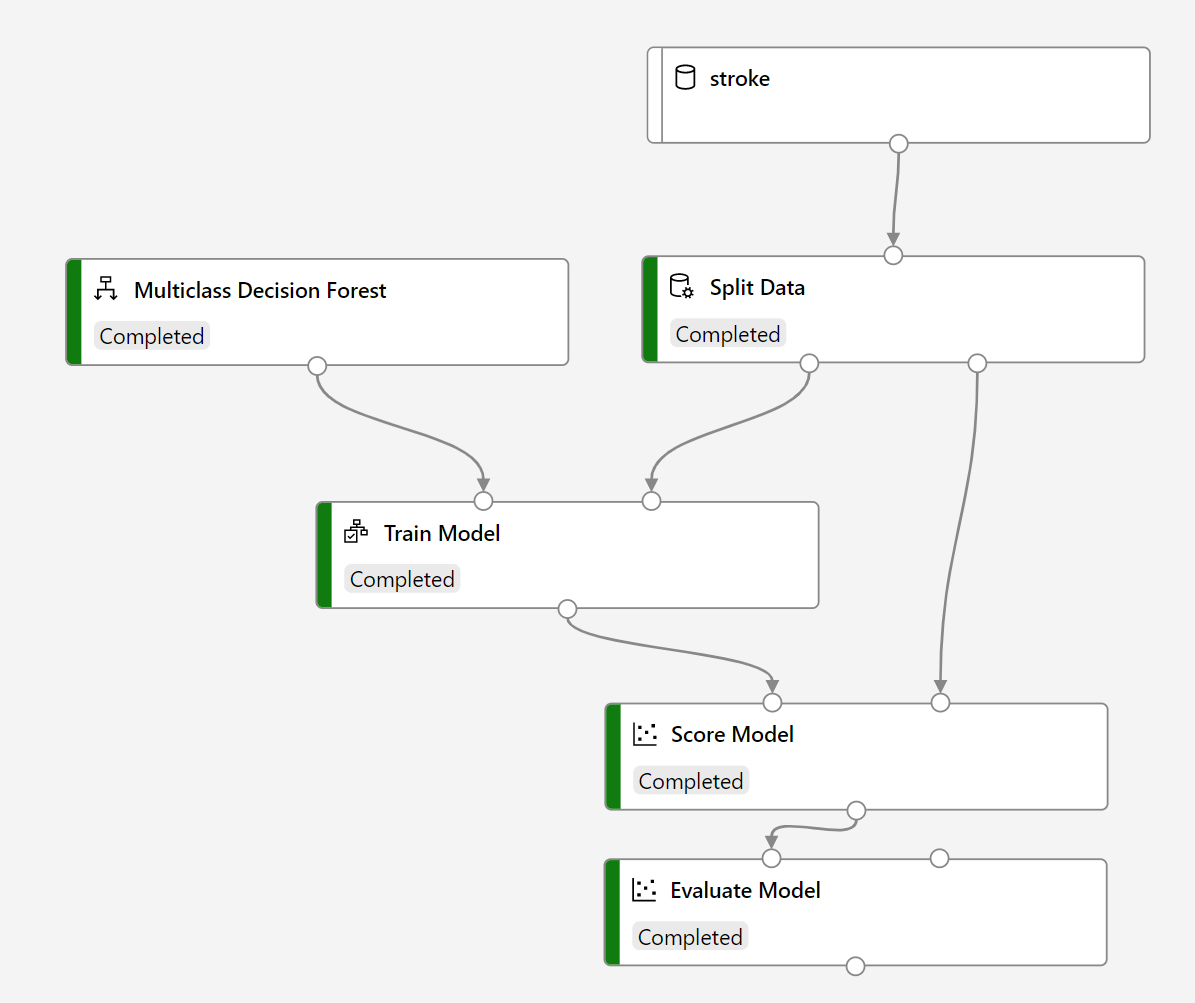

### Real time Inference: Multiclass Decision Forest

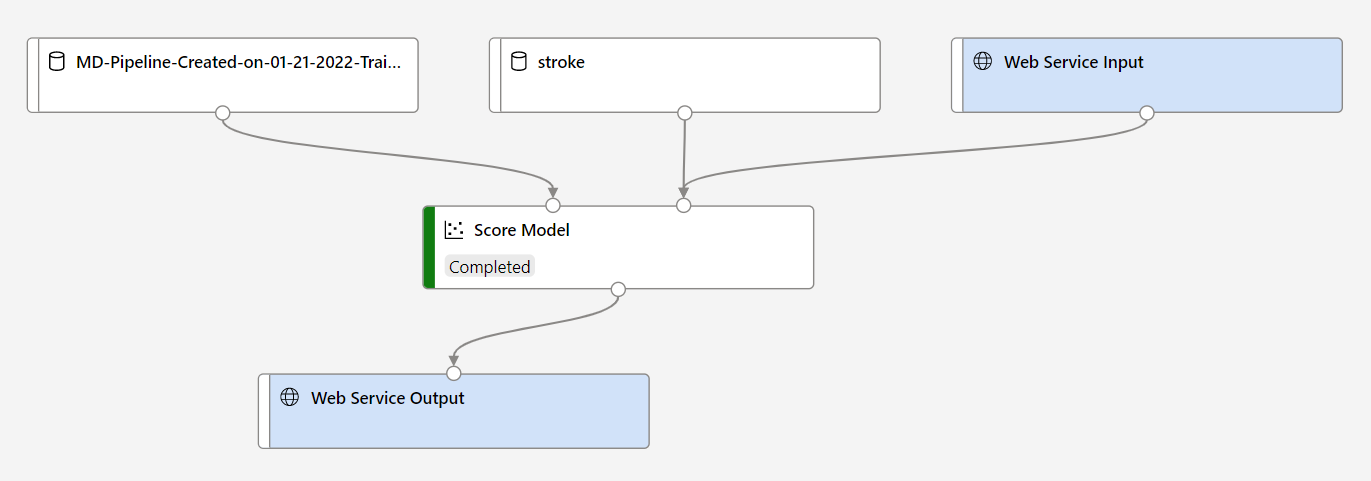

### Model Deployment: Type: Azure Container Instance

In [37]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
    "Inputs": {
        "WebServiceInput0":
        [
            {
                'gender': "1",
                'age': "67",
                'hypertension': "0",
                'heart_disease': "1",
                'ever_married': "1",
                'Residence_type': "1",
                'avg_glucose_level': "228.69",
                'bmi': "36.6",
                'stroke': "1",
            },
        ],
    },
    "GlobalParameters": {
    }
}

body = str.encode(json.dumps(data))

url = 'http://6e751a82-3888-4ef8-9f36-ab5e646d2585.uksouth.azurecontainer.io/score'
api_key = 'ZXb0MO4bg3u91Y8QnArXUvmiQZncnbcA' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

b'{"Results": {"WebServiceOutput0": [{"gender": 1.0, "age": 67.0, "hypertension": 0.0, "heart_disease": 1.0, "ever_married": 1.0, "Residence_type": 1.0, "avg_glucose_level": 228.69, "bmi": 36.6, "stroke": 1.0, "Scored Probabilities_0": 0.875, "Scored Probabilities_1": 0.125, "Scored Labels": 0.0}]}}'
